In [1]:
import pandas as pd

df = pd.read_csv("data/results_p1.csv")
df

,num_cards,mcts_heads,player_0_heads,winner
0,5,42,73,0
1,5,23,67,0
2,5,42,74,0
3,5,25,66,0
4,5,20,72,0
...,...,...,...,...
5989,10,43,69,0
5990,10,25,66,0
5991,10,54,70,0
5992,10,49,77,0


num_cards
5     96.196196
6     97.597598
7     97.197197
8     93.793794
9     92.992993
10    93.093093
Name: 0, dtype: float64

Text(0.5, 0, 'Number of starting cards')

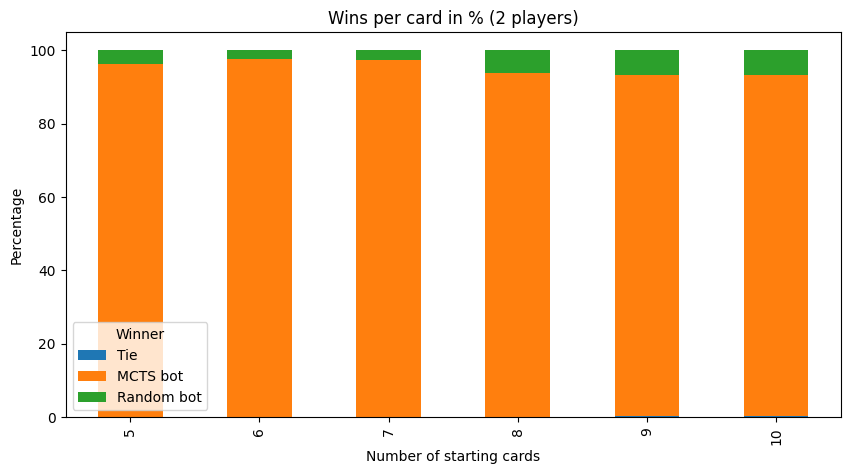

In [ ]:
import matplotlib.pyplot as plt

bot_wins_per_card = df.groupby(["winner", "num_cards"]).size().unstack().fillna(0)
bot_wins_per_card = bot_wins_per_card.div(bot_wins_per_card.sum(axis=0), axis=1) * 100


bot_wins_per_card.T.plot(
    kind="bar", stacked=True, figsize=(10, 5), title="Wins per card in % (2 players)"
)
plt.ylabel("Percentage")
plt.legend(title="Winner", loc="lower left", labels=["Tie", "MCTS bot", "Random bot"])
plt.xlabel("Number of starting cards")

(10.0, 93.0)

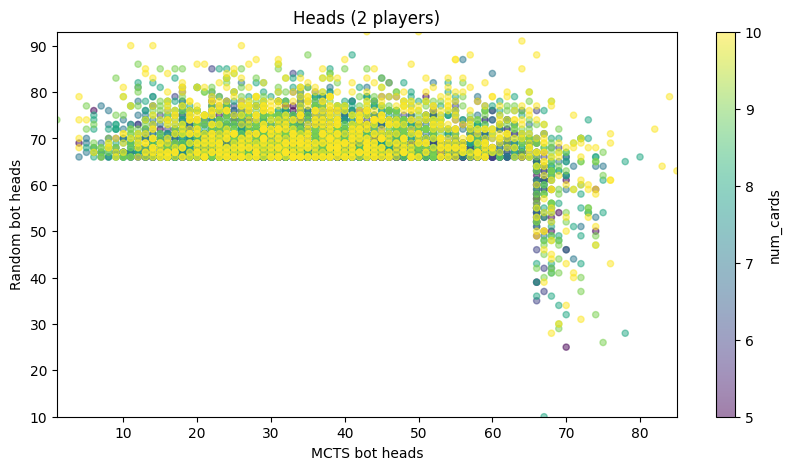

In [49]:
# the size of the markers is proportional how many games end with that cooridnate (mcts_heads, player_0_heads)
df.plot(
    kind="scatter",
    x="mcts_heads",
    y="player_0_heads",
    figsize=(10, 5),
    title="Heads (2 players)",
    c="num_cards",
    colormap="viridis",
    alpha=0.5,
    s=20,
)
plt.ylabel("Random bot heads")
plt.xlabel("MCTS bot heads")
plt.xlim(df.mcts_heads.min(), df.mcts_heads.max())
plt.ylim(df.player_0_heads.min(), df.player_0_heads.max())

<Axes: title={'center': 'Heads (2 players)'}>

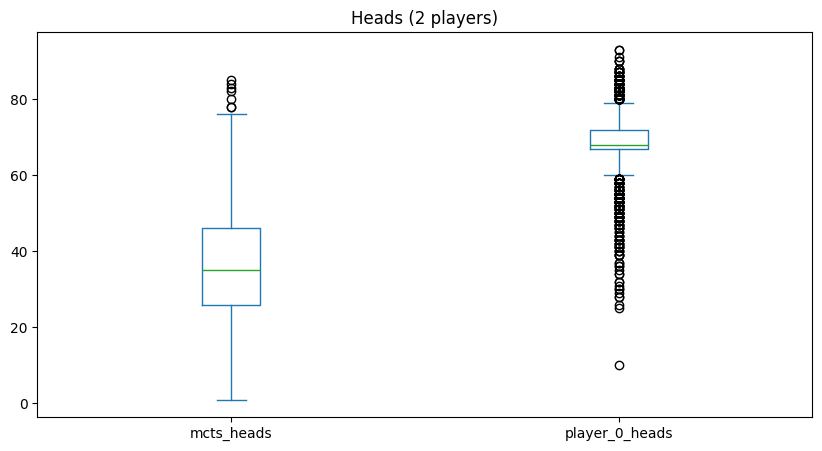

In [45]:
df.plot(
    kind="box",
    y=["mcts_heads", "player_0_heads"],
    figsize=(10, 5),
    title="Heads (2 players)",
)

In [52]:
import os


def create_plots(folder: str):
    csv_files = [f for f in os.listdir(folder) if f.endswith(".csv")]
    for csv_file in csv_files:
        num_players = int(csv_file.split("_")[1].split(".")[0][1]) + 1

        df = pd.read_csv(os.path.join(folder, csv_file))
        bot_wins_per_card = (
            df.groupby(["winner", "num_cards"]).size().unstack().fillna(0)
        )
        bot_wins_per_card = (
            bot_wins_per_card.div(bot_wins_per_card.sum(axis=0), axis=1) * 100
        )
        bot_wins_per_card.T.plot(
            kind="bar",
            stacked=True,
            figsize=(10, 5),
            title=f"Wins per card in % ({num_players} players)",
        )
        plt.ylabel("Percentage")
        plt.legend(title="Winner", loc="lower left")
        plt.xlabel("Number of starting cards")

        y_cols = [col for col in df.columns if "heads" in col]

        df.plot(
            kind="box",
            y=y_cols,
            figsize=(10, 5),
            title=f"Heads ({num_players} players)",
        )

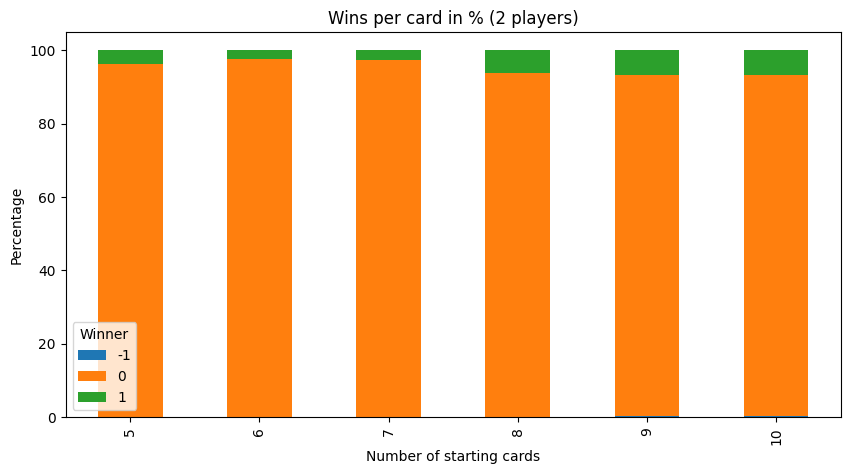

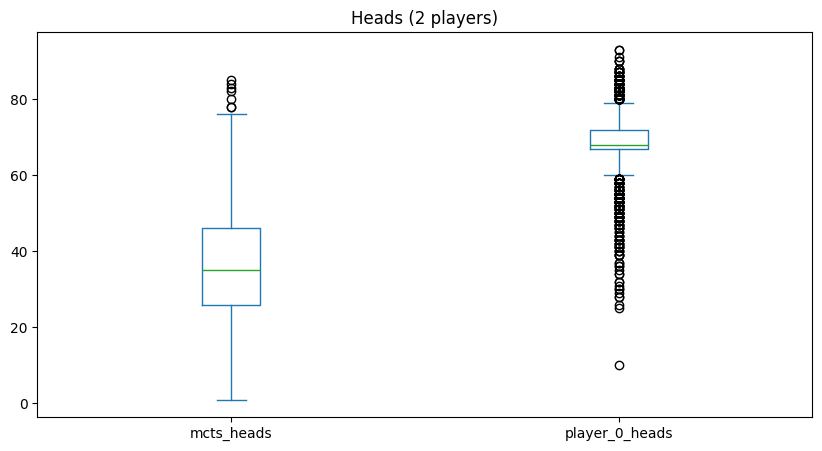

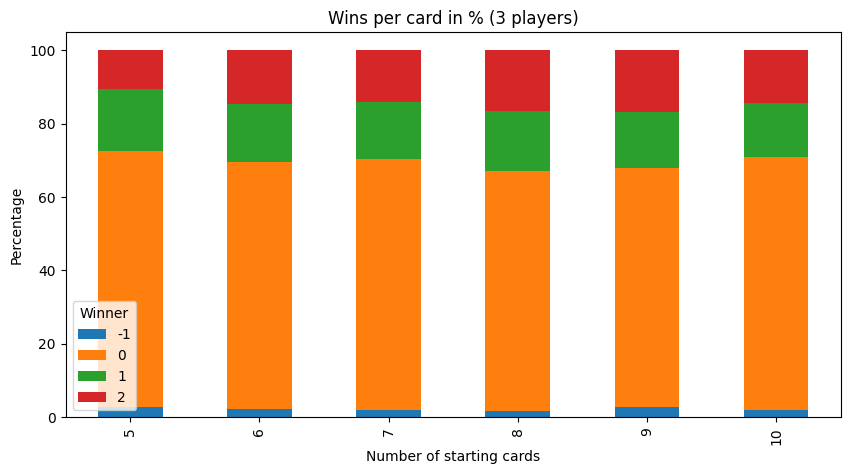

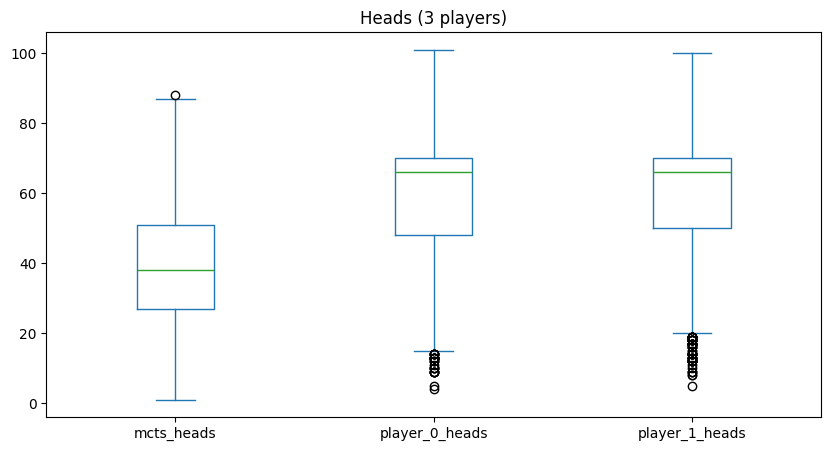

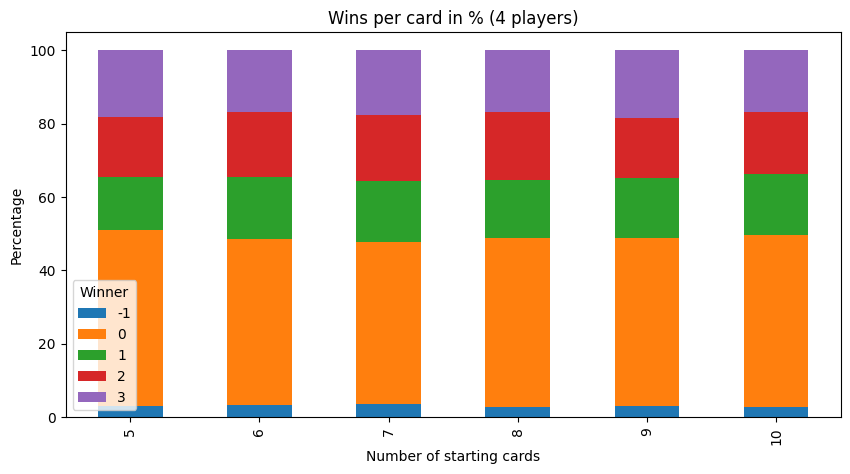

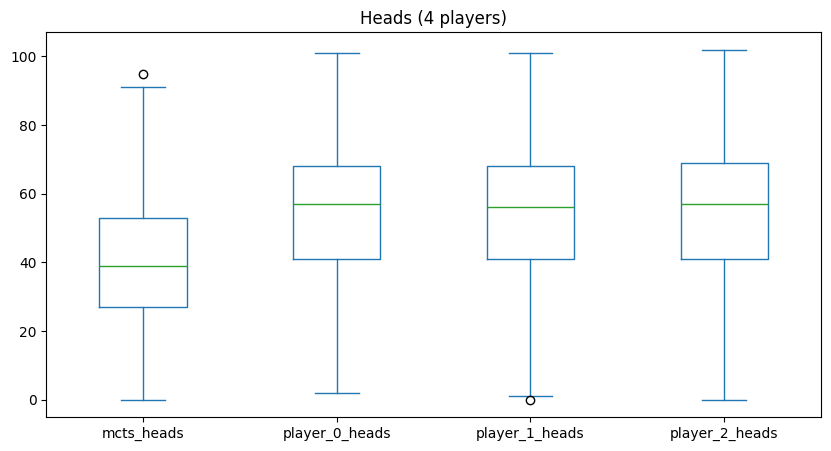

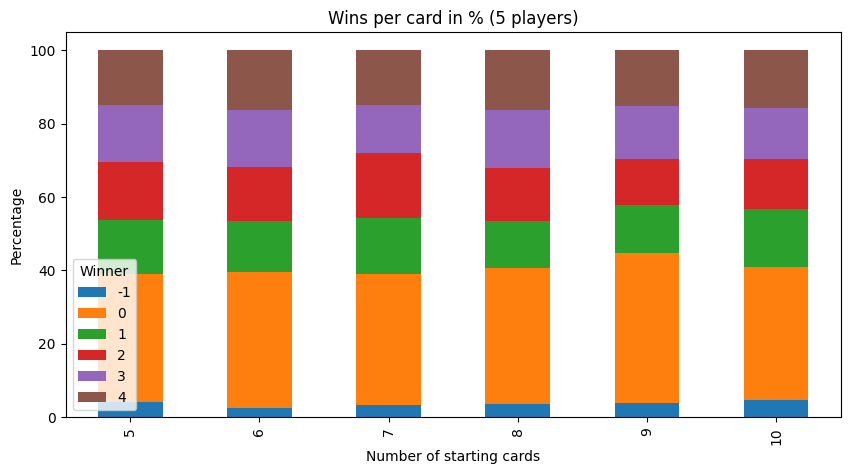

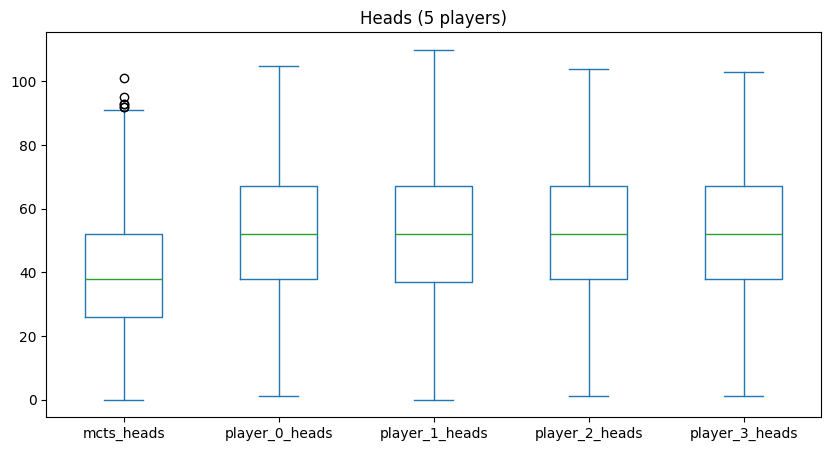

In [53]:
create_plots("data")

In [56]:
def mcts_box_plot(folder: str):
    csv_files = [f for f in os.listdir(folder) if f.endswith(".csv")]
    columns = {}
    for csv_file in csv_files:
        num_players = int(csv_file.split("_")[1].split(".")[0][1]) + 1
        df = pd.read_csv(os.path.join(folder, csv_file))
        columns[num_players] = df["mcts_heads"].values
    df = pd.DataFrame(columns)
    df.plot(
        kind="box",
        y=[col for col in df.columns],
        figsize=(10, 5),
    )
    plt.title("MCTS heads per number of players")
    plt.xlabel("Players")
    plt.ylabel("Heads")

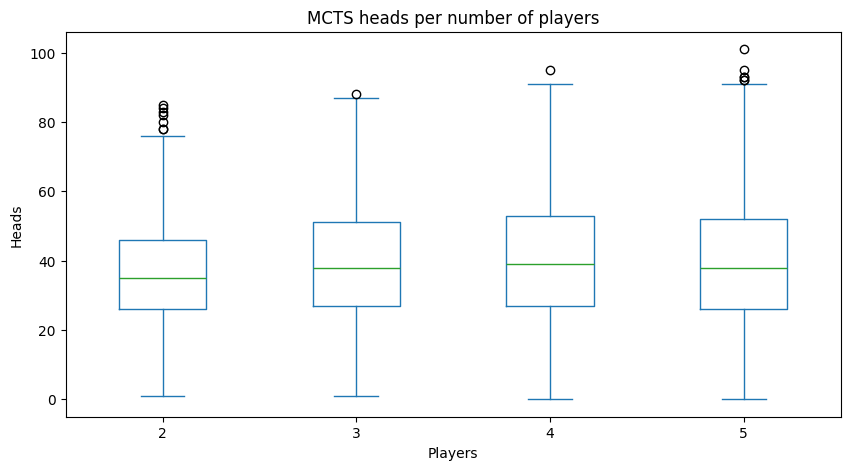

In [57]:
mcts_box_plot("data")

In [82]:
def mcts_plot(folder: str):
    csv_files = [f for f in os.listdir(folder) if f.endswith(".csv")]
    columns = {}
    for csv_file in csv_files:
        num_players = int(csv_file.split("_")[1].split(".")[0][1]) + 1
        df = pd.read_csv(os.path.join(folder, csv_file))
        bot_wins_per_card = (
            df.groupby(["winner", "num_cards"]).size().unstack().fillna(0)
        )
        bot_wins_per_card = (
            bot_wins_per_card.div(bot_wins_per_card.sum(axis=0), axis=1) * 100
        )
        columns[num_players] = bot_wins_per_card.T[0].values
        print(columns[num_players])
    df = pd.DataFrame(columns, index=[5, 6, 7, 8, 9, 10])
    df.index.name = "Cards"
    df.columns.name = "Players"
    df.plot(
        kind="bar",
        figsize=(10, 5),
    )
    plt.title("MCTS wins per number of players")
    plt.ylabel("Percentage")
    plt.xlabel("Number of starting cards")
    plt.show()

[96.1961962  97.5975976  97.1971972  93.79379379 92.99299299 93.09309309]
[69.76976977 67.46746747 68.26826827 65.36536537 65.36536537 69.06906907]
[48.04804805 45.24524525 43.94394394 46.04604605 45.84584585 46.84684685]
[35.13513514 37.03703704 35.63563564 36.93693694 40.74074074 36.43643644]


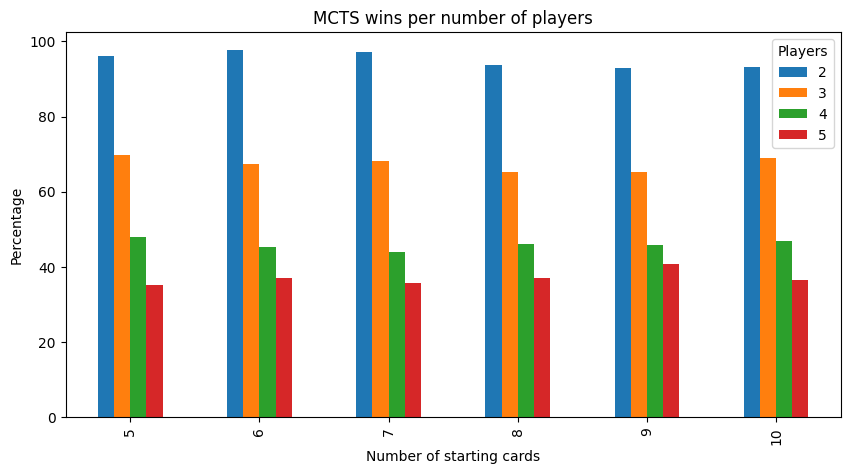

In [83]:
mcts_plot("data")